### import library

In [1]:
import os
import extractor_modify as ex
import annotator as an
import ocr
import matplotlib.pyplot as plt

    1. Extract pdf file to get checkcode, qrcode and whole paper for grading by extractor

Error: There exists a folder called '1081_1'.
Do you want to remove the folder? [y/N]y


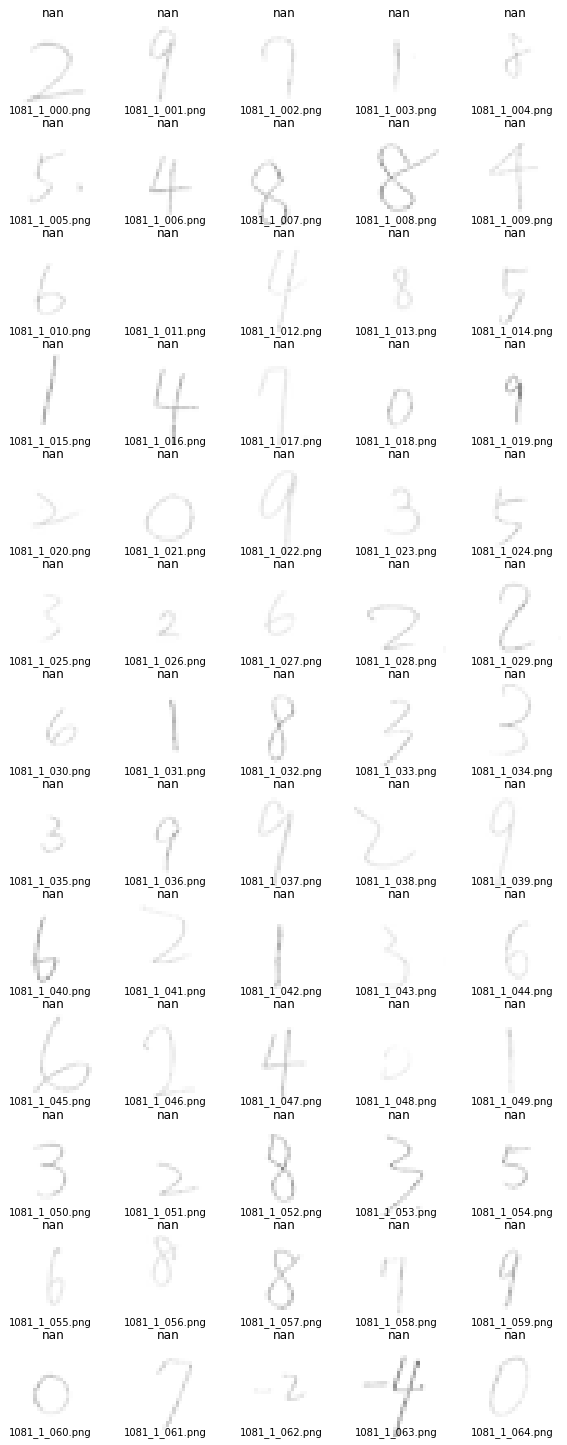

In [2]:
ex.extract(path='pdfs/1081_1.pdf', 
           key_path='keys/key_1081_1.csv', 
           box='auto', ### 'auto' or (left, top, right, bottom)
          )
raw = ex.raw_data('1081_1')
fig = raw.examine()

    2. Use OCR system to classify the digits in checkcode

In [3]:
ocr.predict(mdl_path='OCR_mdl.h5', 
           data_path='1081_1')

1081_1_011.png: Brightness is uniform


    3. Auto-grading on papers by annotator

In [4]:
raw_paper = an.raw_paper('1081_1')
raw_paper.annotate()

Error: There exists a folder called '1081_1_grade'.
Do you want to remove the folder? [y/N]y
